<a href="https://colab.research.google.com/github/pgkramer/portfolio/blob/master/Women_in_the_Global_Workforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

#Introduction: Women in the Global Workforce

Depending upon datasets from the International Labor Organization, I aim to investigate the relationship between various indicators of women's employment. I start by examining datasets regarding collective bargaining coverage (percentage of the workforce covered by collective bargaining agreements) and womens' share of employment in managerial positions (or, what percentage of managerial positions in the workforce are occupied by women). 

All datasets are downloaded from [ILO Statistics.](https://stat.ilo.org)

In [2]:
bargain = pd.read_csv("Bargaining.csv")
bargain.head(10)

,Country,Source,Time,Barg. Cov. Rate
0,Albania,Other administrative records and related sources,2009,40.6
1,Albania,Other administrative records and related sources,2012,47.9
2,Albania,Other administrative records and related sources,2013,58.0
3,Argentina,Other administrative records and related sources,2008,50.9
4,Argentina,Other administrative records and related sources,2009,50.6
5,Argentina,Other administrative records and related sources,2010,52.4
6,Argentina,Other administrative records and related sources,2011,51.2
7,Argentina,Other administrative records and related sources,2012,50.5
8,Argentina,Other administrative records and related sources,2013,51.5
9,Argentina,Other administrative records and related sources,2014,51.0


#Cleaning the Data

The first dataset I found displays collective bargaining coverage. It appears the latest data available is from 2016. In cleaning the data, I will eliminate all cases except those which have collective bargaining coverage figures for 2016, which will provide a more coherent and relevant, if less expansive, dataset. 

In [3]:
bargain.dropna(how='any')
bargain.dtypes

Country             object
Source              object
Time                 int64
Barg. Cov. Rate    float64
dtype: object

In [0]:
bargain=bargain.drop(columns='Source')
bargain.rename(columns = {'Barg. Cov. Rate':'Coverage'}, inplace = True)

In [5]:
bargain = bargain[bargain.Time>=2016]
bargain.head(5)

,Country,Time,Coverage
11,Argentina,2016,51.8
23,Australia,2016,47.1
40,Austria,2016,98.0
58,Belgium,2016,96.0
72,Bulgaria,2016,10.8


In [0]:
bargain.reset_index(drop=True, inplace=True)

In [7]:
bargain.head(5)

,Country,Time,Coverage
0,Argentina,2016,51.8
1,Australia,2016,47.1
2,Austria,2016,98.0
3,Belgium,2016,96.0
4,Bulgaria,2016,10.8


In [8]:
bargain.Coverage.describe()

count    35.000000
mean     31.877143
std      31.541701
min       0.600000
25%       7.900000
50%      16.700000
75%      49.450000
max      98.000000
Name: Coverage, dtype: float64

Given the standard deviation, it appears that this distribution is not normal.

In [9]:
print(bargain)

                 Country  Time  Coverage
0              Argentina  2016      51.8
1              Australia  2016      47.1
2                Austria  2016      98.0
3                Belgium  2016      96.0
4               Bulgaria  2016      10.8
5                 Canada  2016      30.3
6                  Chile  2016      17.9
7               Colombia  2016      15.7
8             Costa Rica  2016      10.6
9                Croatia  2016      46.7
10           El Salvador  2016       5.0
11               Germany  2016      56.0
12                 Ghana  2016      14.7
13                Greece  2016      17.8
14               Iceland  2016      90.0
15                 Japan  2016      16.7
16                Latvia  2016      13.8
17              Malaysia  2016       1.3
18             Mauritius  2016       0.6
19                Mexico  2016       9.9
20  Moldova, Republic of  2016      43.0
21           Netherlands  2016      78.6
22           New Zealand  2016      15.9
23              

The next dataset displays the percentage of managerial positions occupied by women by country.

In [0]:
womenmanage = pd.read_csv("ILOSTAT_.csv")

In [11]:
womenmanage.head(5)

,collection,collection.label,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,classif1,classif1.label,classif2,classif2.label,classif3,classif3.label,classif4,classif4.label,classif5,classif5.label,time,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label,Unnamed: 30
0,SDG,SDG labour market indicators,ARE,United Arab Emirates,BA:716,ARE - LFS - Labour force survey,SDG_0552_OCU_RT,SDG indicator 5.5.2 - Female share of employme...,NaN,NaN,OCU_MGMT_TOTAL,Occupation (Managerial positions): Total manag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,14.6,NaN,NaN,NaN,NaN,NaN,NaN,T3:95,Age coverage - maximum age: 65 years old,NaN
1,SDG,SDG labour market indicators,ARM,Armenia,BA:867,ARM - LFS - Household Labour Force Survey,SDG_0552_OCU_RT,SDG indicator 5.5.2 - Female share of employme...,NaN,NaN,OCU_MGMT_TOTAL,Occupation (Managerial positions): Total manag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,29.5,NaN,NaN,NaN,NaN,NaN,NaN,R1:3513_T3:240,Repository: ILO-STATISTICS - Micro data proces...,NaN
2,SDG,SDG labour market indicators,AUS,Australia,BA:518,AUS - LFS - Labour Force Survey,SDG_0552_OCU_RT,SDG indicator 5.5.2 - Female share of employme...,NaN,NaN,OCU_MGMT_TOTAL,Occupation (Managerial positions): Total manag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,36.7,NaN,NaN,NaN,NaN,T12:145,Working time arrangement coverage: Full-time a...,S4:30_S5:38,"Geographical coverage: Total national, excludi...",NaN
3,SDG,SDG labour market indicators,AUT,Austria,BA:536,AUT - LFS - EU Labour Force Survey,SDG_0552_OCU_RT,SDG indicator 5.5.2 - Female share of employme...,NaN,NaN,OCU_MGMT_SENIOR,Occupation (Managerial positions): Senior and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,29.5,NaN,NaN,NaN,NaN,NaN,NaN,R1:2384,Repository: Eurostat special tabulation,NaN
4,SDG,SDG labour market indicators,AUT,Austria,BA:536,AUT - LFS - EU Labour Force Survey,SDG_0552_OCU_RT,SDG indicator 5.5.2 - Female share of employme...,NaN,NaN,OCU_MGMT_TOTAL,Occupation (Managerial positions): Total manag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,31.8,NaN,NaN,NaN,NaN,NaN,NaN,R1:2384,Repository: Eurostat special tabulation,NaN


In [12]:
list(womenmanage.columns)

['collection',
 'collection.label',
 'ref_area',
 'ref_area.label',
 'source',
 'source.label',
 'indicator',
 'indicator.label',
 'sex',
 'sex.label',
 'classif1',
 'classif1.label',
 'classif2',
 'classif2.label',
 'classif3',
 'classif3.label',
 'classif4',
 'classif4.label',
 'classif5',
 'classif5.label',
 'time',
 'obs_value',
 'obs_status',
 'obs_status.label',
 'note_classif',
 'note_classif.label',
 'note_indicator',
 'note_indicator.label',
 'note_source',
 'note_source.label',
 'Unnamed: 30']

Many of the given features are irrelevant to this analysis and need to be dropped. Some countries have values for both "Senior" and "Total" management --I will remove "senior" as many countries do not have that data. 

In [0]:
womenmanage = womenmanage[['classif1','ref_area.label','obs_value']]

In [0]:
allmanage = womenmanage['classif1']=='OCU_MGMT_TOTAL'
womenmanage = womenmanage[allmanage]

In [15]:
womenmanage.head(5)

,classif1,ref_area.label,obs_value
0,OCU_MGMT_TOTAL,United Arab Emirates,14.6
1,OCU_MGMT_TOTAL,Armenia,29.5
2,OCU_MGMT_TOTAL,Australia,36.7
4,OCU_MGMT_TOTAL,Austria,31.8
5,OCU_MGMT_TOTAL,Azerbaijan,34.9


In [0]:
womenmanage.drop(columns='classif1', inplace=True)
womenmanage.rename(columns = {'ref_area.label': 'Country', 'obs_value': 'Female_Managers'}, inplace = True)

In [17]:
womenmanage.reset_index(drop=True, inplace=True)
womenmanage.head()

,Country,Female_Managers
0,United Arab Emirates,14.6
1,Armenia,29.5
2,Australia,36.7
3,Austria,31.8
4,Azerbaijan,34.9


#Exploring the Combined Data

Let's merge!

In [0]:
wmnbrgn = pd.merge(bargain, womenmanage, on="Country", sort=True)

In [19]:
wmnbrgn

,Country,Time,Coverage,Female_Managers
0,Australia,2016,47.1,36.7
1,Austria,2016,98.0,31.8
2,Belgium,2016,96.0,32.7
3,Bulgaria,2016,10.8,37.9
4,Chile,2016,17.9,27.4
5,Costa Rica,2016,10.6,34.6
6,Croatia,2016,46.7,29.9
7,El Salvador,2016,5.0,35.3
8,Germany,2016,56.0,29.3
9,Greece,2016,17.8,25.5


In [20]:
wmnbrgn.describe(exclude='category')

,Country,Time,Coverage,Female_Managers
count,29,29.0,29.000000,29.000000
unique,29,NaN,NaN,NaN
top,Bulgaria,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,2016.0,33.989655,32.386207
std,NaN,0.0,33.577377,7.852785
min,NaN,2016.0,0.600000,13.000000
25%,NaN,2016.0,5.900000,29.300000
50%,NaN,2016.0,17.800000,32.700000
75%,NaN,2016.0,56.000000,36.000000


In [0]:
Cover = wmnbrgn['Coverage']
F_M=wmnbrgn['Female_Managers']

In [22]:
stats.linregress(Cover, F_M)

LinregressResult(slope=0.016951353292258862, intercept=31.810036243442088, rvalue=0.07248154426052689, pvalue=0.7086663586185833, stderr=0.044890169915453415)

In [23]:
stats.pearsonr(Cover, F_M)

(0.07248154426052689, 0.708666358618583)

Given the distribution of the bargaining coverage observations, a spearman correlation might provide a better test for us.

In [24]:
stats.spearmanr(Cover, F_M)

SpearmanrResult(correlation=0.0004927929075219425, pvalue=0.9979757431134768)

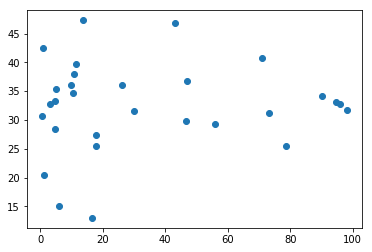

In [25]:
plt.scatter(Cover, F_M)

#If at first you don't find a correlation!

There seems to be no correlation between these data! Boring! Let's try for something else. I found numbers for countries' monthly minimum wage (harmonized for $USD) and cleaned the data for our given countries in 2016 once more.

In [0]:
MMW = pd.read_csv("MMW.csv")

In [27]:
MMW.head

<bound method NDFrame.head of             Country  2016
0           Albania   177
1         Australia  2165
2           Belgium  1695
3            Brazil   252
4          Bulgaria   238
5           Croatia   458
6    Czech Republic   405
7           Estonia   476
8            France  1622
9           Germany  1593
10           Greece   756
11          Hungary   394
12          Ireland  1711
13           Latvia   409
14        Lithuania   420
15       Luxembourg  2127
16         Malaysia   217
17            Malta   805
18       Montenegro   319
19      Netherlands  1700
20    New Caledonia  1417
21  North Macedonia   261
22           Poland   469
23         Portugal   684
24          Romania   308
25           Serbia   255
26         Slovakia   448
27         Slovenia   875
28            Spain   846
29             Togo    59
30           Turkey   545
31   United Kingdom  1611
32    United States  1257>

In [0]:
WoBaWa = pd.merge(wmnbrgn, MMW, on="Country", sort=True)

In [0]:
WoBaWa.rename(columns = {'2016': "MnthMnWg"}, inplace = True)

In [0]:
WoBaWa.drop(columns="Time", inplace=True)

In [31]:
WoBaWa.head()

,Country,Coverage,Female_Managers,MnthMnWg
0,Australia,47.1,36.7,2165
1,Belgium,96.0,32.7,1695
2,Bulgaria,10.8,37.9,238
3,Croatia,46.7,29.9,458
4,Germany,56.0,29.3,1593


In [0]:
MMW = WoBaWa['MnthMnWg']

In [33]:
stats.pearsonr(WoBaWa["Female_Managers"], WoBaWa["MnthMnWg"])

(0.12863424226400633, 0.6611977527443272)

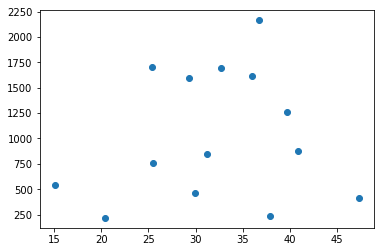

In [34]:
plt.scatter(WoBaWa["Female_Managers"], WoBaWa["MnthMnWg"])

In [35]:
stats.linregress(WoBaWa["Female_Managers"], WoBaWa["MnthMnWg"])

LinregressResult(slope=9.504133825983784, intercept=722.0070328101332, rvalue=0.12863424226400635, pvalue=0.6611977527443269, stderr=21.151549265263796)

#If at second you don't find a correlation!

The correlation here is slightly stronger, but the p-value still suggests insignificance. I will not rest until we find something interesting! Let's try again.
The following shows # of women in finance by the thousand per country in 2016.

In [0]:
wif = pd.read_csv("Women in finance.csv")

In [0]:
WoBaWaFi = pd.merge(WoBaWa, wif, on="Country", sort=True)

In [38]:
WoBaWaFi.head(5)

,Country,Coverage,Female_Managers,MnthMnWg,Wmn_Finance_Thousands
0,Australia,47.1,36.7,2165,211.0
1,Belgium,96.0,32.7,1695,61.0
2,Bulgaria,10.8,37.9,238,39.0
3,Croatia,46.7,29.9,458,25.0
4,Germany,56.0,29.3,1593,627.0


In [39]:
stats.pearsonr(WoBaWaFi["Female_Managers"], WoBaWaFi["Wmn_Finance_Thousands"])

(0.15147415544108156, 0.5616867028670174)

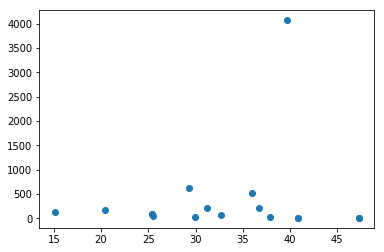

In [40]:
plt.scatter(WoBaWaFi["Female_Managers"], WoBaWaFi["Wmn_Finance_Thousands"])

#Please for the love of Data give me a correlation.

Thankfully it's not the destination but the journey that counts! I have another relationship we might test. This time, I downloaded the "low pay" indicator from the ILO for women. This refers to the percentage of women whose hourly earnings at all jobs were less than two-thirds of median hourly earnings. In other words, it's the percentage of working women who are being underpaid (per country, 2016). 

In [0]:
low_pay = pd.read_csv("Low pay.csv")

In [55]:
low_pay

,Country,Wmn Low Pay Rate
0,Australia,19.6
1,Austria,24.4
2,Belgium,5.4
3,Canada,20.8
4,Costa Rica,3.4
5,Czech Republic,25.4
6,Dominican Republic,23.6
7,Finland,9.6
8,Hungary,21.1
9,Japan,22.8


In [0]:
women_work = pd.merge(womenmanage, low_pay, on="Country", sort=True)

In [57]:
women_work.head

<bound method NDFrame.head of                Country  Female_Managers  Wmn Low Pay Rate
0            Australia             36.7              19.6
1              Austria             31.8              24.4
2              Belgium             32.7               5.4
3           Costa Rica             34.6               3.4
4       Czech Republic             25.4              25.4
5   Dominican Republic             36.6              23.6
6              Finland             34.1               9.6
7              Hungary             39.4              21.1
8                Japan             13.0              22.8
9   Korea, Republic of              9.8              37.2
10            Maldives             19.6              62.0
11              Mexico             36.0              21.7
12            Mongolia             40.8              20.3
13              Poland             41.2              22.6
14            Slovakia             35.0              22.0
15            Thailand             32.7   

In [58]:
stats.pearsonr(women_work["Wmn Low Pay Rate"], women_work["Female_Managers"])

(-0.4760472761551561, 0.05340343844798568)

I will take it! There seems to be a moderate, negative relationship between these two features. The p-value is so very close to being less than .05! I wonder if we would find more significant with a larger data-set. Anywho, let's visualize! 

Text(0, 0.5, 'Female Managers')

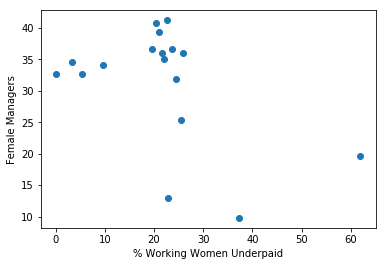

In [83]:
plt.scatter(women_work["Wmn Low Pay Rate"], women_work["Female_Managers"])
countries = women_work["Country"]
plt.xlabel('% Working Women Underpaid')
plt.ylabel('Female Managers')

Text(0.5, 1.0, 'Women in the Global Workforce')

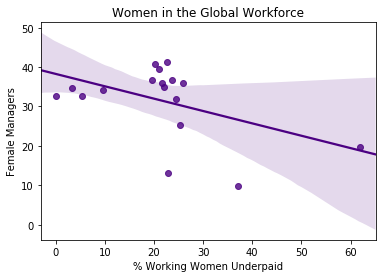

In [95]:
sns.regplot(women_work["Wmn Low Pay Rate"], women_work["Female_Managers"], color ="indigo")
plt.xlabel('% Working Women Underpaid')
plt.ylabel('Female Managers')
plt.title("Women in the Global Workforce")

#Victory!

This helps us see the negative relationship between the share of women underpaid in a country and the number of female managers in a country: it looks like the more women in managerial positions, the less likely it is women will be underpaid in a country (in 2016, at least!).